In [851]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import VotingClassifier

# Import the data

In [852]:
df = pd.read_csv('1 - Project Data.csv')

In [853]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# EDA

In [854]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [855]:
df.shape

(7043, 31)

C:\Users\le4fe\AppData\Local\Temp\ipykernel_31348\1322822998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\le4fe\AppData\Local\Temp\ipykernel_31348\1322822998.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
C:\Users\le4fe\AppData\Local\Temp\ipykernel_31348\1322822998.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr()))


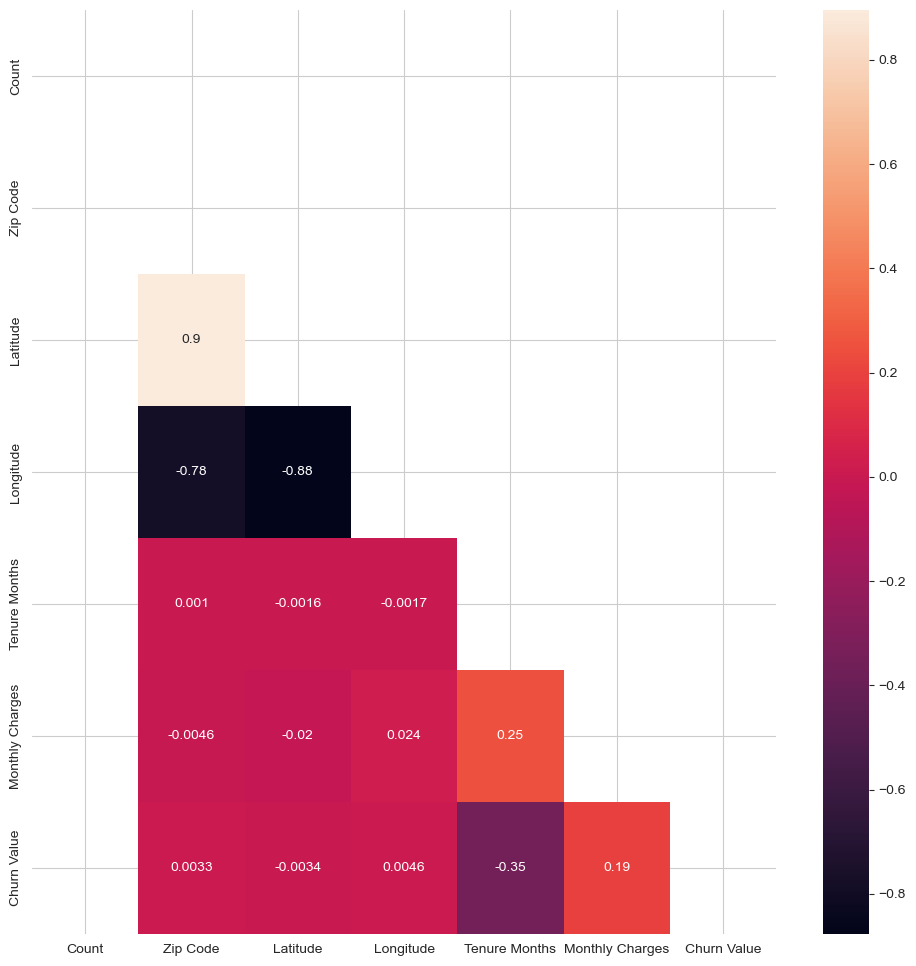

In [856]:
df.corr()

plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),
            annot = True,
            mask = np.triu(df.corr()))

plt.show()

In [857]:
df_churn = df.where(df["Churn Value"] == 1)

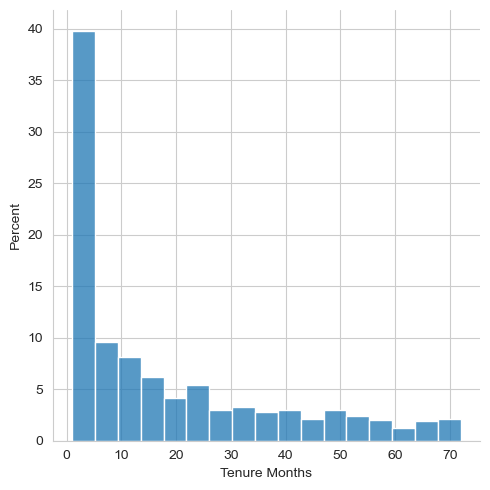

In [858]:
sns.displot(x = df_churn['Tenure Months'], stat='percent')

plt.show()

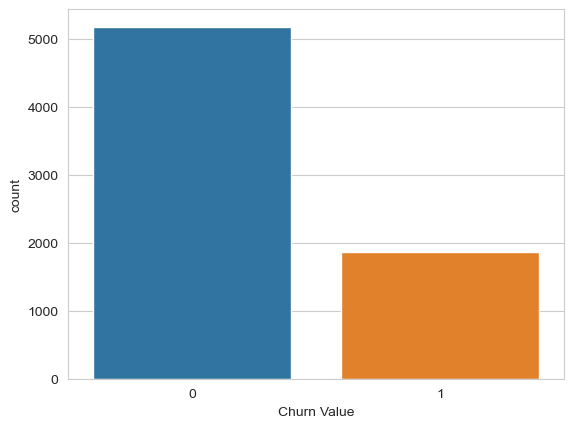

In [859]:
sns.countplot(x = df['Churn Value'])
plt.show()

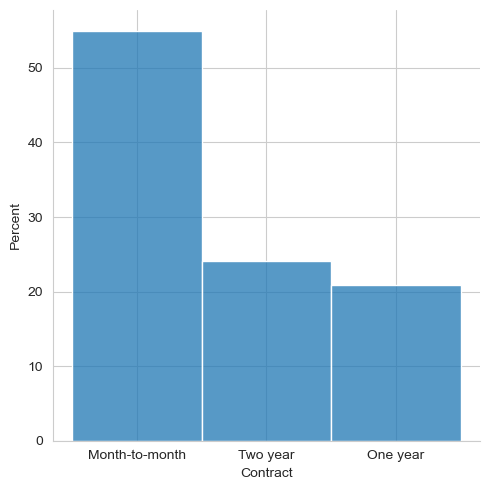

In [860]:
sns.displot(x = df['Contract'], stat='percent')
plt.show()

In [861]:
df_churn.Gender.value_counts(normalize = True)

Female    0.502408
Male      0.497592
Name: Gender, dtype: float64

In [862]:
df_churn['Senior Citizen'].value_counts(normalize = True)

No     0.745318
Yes    0.254682
Name: Senior Citizen, dtype: float64

In [863]:
df_churn.Partner.value_counts(normalize = True)

No     0.642055
Yes    0.357945
Name: Partner, dtype: float64

In [864]:
df_churn.Dependents.value_counts(normalize = True)

No     0.943285
Yes    0.056715
Name: Dependents, dtype: float64

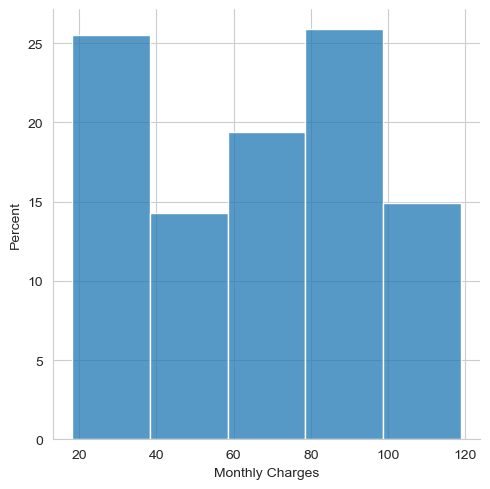

In [865]:
sns.displot(x = df['Monthly Charges'], stat='percent', bins=5)
plt.show()

# Data Cleaning

## One Hot Encoding

In [866]:
categorical_columns = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Contract', 'Payment Method']

df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=False,
                    prefix=['Mult_lines', 'Internet', 'Online_sec', 'Online_backup',
                            'Device_prot', 'tech_supp', 'Stream_tv', 'Stream_mov',
                            'Contract', 'Pay_meth'])


In [867]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Stream_mov_No,Stream_mov_No internet service,Stream_mov_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Pay_meth_Bank transfer (automatic),Pay_meth_Credit card (automatic),Pay_meth_Electronic check,Pay_meth_Mailed check
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,1,0,0,1,0,0,0,0,0,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,1,0,0,1,0,0,0,0,1,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,0,0,1,1,0,0,0,0,1,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,0,0,1,1,0,0,0,0,1,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,0,0,1,1,0,0,1,0,0,0


## Mapping

In [868]:
def clean(df):
    df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0,'Yes':1})
    df.Partner = df.Partner.map({'No':0,'Yes':1})
    df.Dependents = df.Dependents.map({'No':0,'Yes':1})
    df['Phone Service'] = df['Phone Service'].map({'No':0,'Yes':1})
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0,'Yes':1})

    return df

In [869]:
df_mapped = clean(df)

In [870]:
df_mapped.dtypes

CustomerID                             object
Count                                   int64
Country                                object
State                                  object
City                                   object
Zip Code                                int64
Lat Long                               object
Latitude                              float64
Longitude                             float64
Gender                                  int64
Senior Citizen                          int64
Partner                                 int64
Dependents                              int64
Tenure Months                           int64
Phone Service                           int64
Paperless Billing                       int64
Monthly Charges                       float64
Total Charges                          object
Churn Label                            object
Churn Value                             int64
Churn Reason                           object
Mult_lines_No                     

In [871]:
df_mapped.columns = df.columns.str.lower().str.replace(' ', '_')

In [872]:
df_mapped.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,stream_mov_no,stream_mov_no_internet_service,stream_mov_yes,contract_month-to-month,contract_one_year,contract_two_year,pay_meth_bank_transfer_(automatic),pay_meth_credit_card_(automatic),pay_meth_electronic_check,pay_meth_mailed_check
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,1,0,0,1,0,0,0,0,0,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,...,1,0,0,1,0,0,0,0,1,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,...,0,0,1,1,0,0,0,0,1,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,...,0,0,1,1,0,0,0,0,1,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,0,0,1,1,0,0,1,0,0,0


## Null Handling

In [873]:
df_mapped.isnull().sum()/len(df)*100

customerid                             0.000000
count                                  0.000000
country                                0.000000
state                                  0.000000
city                                   0.000000
zip_code                               0.000000
lat_long                               0.000000
latitude                               0.000000
longitude                              0.000000
gender                                 0.000000
senior_citizen                         0.000000
partner                                0.000000
dependents                             0.000000
tenure_months                          0.000000
phone_service                          0.000000
paperless_billing                      0.000000
monthly_charges                        0.000000
total_charges                          0.000000
churn_label                            0.000000
churn_value                            0.000000
churn_reason                          73

In [874]:
df_mapped.dtypes

customerid                             object
count                                   int64
country                                object
state                                  object
city                                   object
zip_code                                int64
lat_long                               object
latitude                              float64
longitude                             float64
gender                                  int64
senior_citizen                          int64
partner                                 int64
dependents                              int64
tenure_months                           int64
phone_service                           int64
paperless_billing                       int64
monthly_charges                       float64
total_charges                          object
churn_label                            object
churn_value                             int64
churn_reason                           object
mult_lines_no                     

In [875]:
df_mapped.total_charges = pd.to_numeric(df_mapped.total_charges, errors='coerce')

In [876]:
df_mapped.isnull().sum()

customerid                               0
count                                    0
country                                  0
state                                    0
city                                     0
zip_code                                 0
lat_long                                 0
latitude                                 0
longitude                                0
gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure_months                            0
phone_service                            0
paperless_billing                        0
monthly_charges                          0
total_charges                           11
churn_label                              0
churn_value                              0
churn_reason                          5174
mult_lines_no                            0
mult_lines_no_phone_service              0
mult_lines_

## Dropping insignificant or incompatible columns

In [877]:
df_mapped.drop(['count', 'country', 'state', 'zip_code', 'lat_long', 'latitude', 'longitude','churn_label', 'churn_reason'], axis=1, inplace=True)

In [878]:
df_mapped.isnull().sum()

customerid                             0
city                                   0
gender                                 0
senior_citizen                         0
partner                                0
dependents                             0
tenure_months                          0
phone_service                          0
paperless_billing                      0
monthly_charges                        0
total_charges                         11
churn_value                            0
mult_lines_no                          0
mult_lines_no_phone_service            0
mult_lines_yes                         0
internet_dsl                           0
internet_fiber_optic                   0
internet_no                            0
online_sec_no                          0
online_sec_no_internet_service         0
online_sec_yes                         0
online_backup_no                       0
online_backup_no_internet_service      0
online_backup_yes                      0
device_prot_no  

In [879]:
df_mapped.dropna(inplace = True)

In [880]:
df_mapped.head(5)

,customerid,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,...,stream_mov_no,stream_mov_no_internet_service,stream_mov_yes,contract_month-to-month,contract_one_year,contract_two_year,pay_meth_bank_transfer_(automatic),pay_meth_credit_card_(automatic),pay_meth_electronic_check,pay_meth_mailed_check
0,3668-QPYBK,Los Angeles,0,0,0,0,2,1,1,53.85,...,1,0,0,1,0,0,0,0,0,1
1,9237-HQITU,Los Angeles,1,0,0,1,2,1,1,70.70,...,1,0,0,1,0,0,0,0,1,0
2,9305-CDSKC,Los Angeles,1,0,0,1,8,1,1,99.65,...,0,0,1,1,0,0,0,0,1,0
3,7892-POOKP,Los Angeles,1,0,1,1,28,1,1,104.80,...,0,0,1,1,0,0,0,0,1,0
4,0280-XJGEX,Los Angeles,0,0,0,1,49,1,1,103.70,...,0,0,1,1,0,0,1,0,0,0


In [881]:
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customerid                          7032 non-null   object 
 1   city                                7032 non-null   object 
 2   gender                              7032 non-null   int64  
 3   senior_citizen                      7032 non-null   int64  
 4   partner                             7032 non-null   int64  
 5   dependents                          7032 non-null   int64  
 6   tenure_months                       7032 non-null   int64  
 7   phone_service                       7032 non-null   int64  
 8   paperless_billing                   7032 non-null   int64  
 9   monthly_charges                     7032 non-null   float64
 10  total_charges                       7032 non-null   float64
 11  churn_value                         7032 no

# Feature Engineering and Train/Test Split

In [882]:
Features = ['gender', 'senior_citizen', 'partner',
'dependents', 'tenure_months', 'phone_service', 'paperless_billing',
'monthly_charges', 'total_charges', 'mult_lines_no',
'mult_lines_no_phone_service', 'mult_lines_yes', 'internet_dsl',
'internet_fiber_optic', 'internet_no', 'online_sec_no',
'online_sec_no_internet_service', 'online_sec_yes', 'online_backup_no',
'online_backup_no_internet_service', 'online_backup_yes',
'device_prot_no', 'device_prot_no_internet_service', 'device_prot_yes',
'tech_supp_no', 'tech_supp_no_internet_service', 'tech_supp_yes',
'stream_tv_no', 'stream_tv_no_internet_service', 'stream_tv_yes',
'stream_mov_no', 'stream_mov_no_internet_service', 'stream_mov_yes',
'contract_month-to-month', 'contract_one_year', 'contract_two_year',
'pay_meth_bank_transfer_(automatic)',
'pay_meth_credit_card_(automatic)', 'pay_meth_electronic_check',
'pay_meth_mailed_check']


In [883]:
df_model = df_mapped[Features].copy()

In [884]:
df_model.shape

(7032, 40)

In [885]:
X = df_model
y = df_mapped['churn_value']

In [886]:
X.shape

(7032, 40)

In [887]:
df_mapped

,customerid,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,...,stream_mov_no,stream_mov_no_internet_service,stream_mov_yes,contract_month-to-month,contract_one_year,contract_two_year,pay_meth_bank_transfer_(automatic),pay_meth_credit_card_(automatic),pay_meth_electronic_check,pay_meth_mailed_check
0,3668-QPYBK,Los Angeles,0,0,0,0,2,1,1,53.85,...,1,0,0,1,0,0,0,0,0,1
1,9237-HQITU,Los Angeles,1,0,0,1,2,1,1,70.70,...,1,0,0,1,0,0,0,0,1,0
2,9305-CDSKC,Los Angeles,1,0,0,1,8,1,1,99.65,...,0,0,1,1,0,0,0,0,1,0
3,7892-POOKP,Los Angeles,1,0,1,1,28,1,1,104.80,...,0,0,1,1,0,0,0,0,1,0
4,0280-XJGEX,Los Angeles,0,0,0,1,49,1,1,103.70,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,1,0,0,0,72,1,1,21.15,...,0,1,0,0,0,1,1,0,0,0
7039,6840-RESVB,Adelanto,0,0,1,1,24,1,1,84.80,...,0,0,1,0,1,0,0,0,0,1
7040,2234-XADUH,Amboy,1,0,1,1,72,1,1,103.20,...,0,0,1,0,1,0,0,1,0,0
7041,4801-JZAZL,Angelus Oaks,1,0,1,1,11,0,1,29.60,...,1,0,0,1,0,0,0,0,1,0


In [888]:
y.shape

(7032,)

In [889]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [890]:
y_train.shape

(5625,)

# Logistic Regression Model

In [891]:
lr = LogisticRegression(max_iter=300, random_state=100, verbose = 3)

In [892]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=300, random_state=100, verbose=3)

In [893]:
lr.predict_proba(X_train)

array([[0.28329794, 0.71670206],
       [0.68376802, 0.31623198],
       [0.45633998, 0.54366002],
       ...,
       [0.48928554, 0.51071446],
       [0.53438173, 0.46561827],
       [0.58076158, 0.41923842]])

In [894]:
X_train[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train)

In [895]:
X_train['y_pred'] = np.where(X_train['prob_churn']> .4, # This is the condition
                              1,
                              0)

In [896]:
X_train.head(20)

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,mult_lines_no,...,contract_month-to-month,contract_one_year,contract_two_year,pay_meth_bank_transfer_(automatic),pay_meth_credit_card_(automatic),pay_meth_electronic_check,pay_meth_mailed_check,prob_stay,prob_churn,y_pred
6030,0,0,1,0,24,1,1,93.00,2248.05,0,...,1,0,0,0,0,1,0,0.283298,0.716702,1
3409,1,0,1,0,40,1,1,78.85,3126.85,0,...,1,0,0,0,1,0,0,0.683768,0.316232,0
5482,0,0,1,0,4,1,0,65.60,250.10,0,...,1,0,0,0,0,1,0,0.456340,0.543660,1
5523,1,0,0,0,4,1,0,55.50,227.35,1,...,1,0,0,0,1,0,0,0.668737,0.331263,0
6337,1,0,1,1,64,1,0,24.90,1595.50,0,...,0,1,0,0,0,0,1,0.998344,0.001656,0
5283,0,1,1,0,69,1,1,95.35,6382.00,0,...,1,0,0,1,0,0,0,0.665761,0.334239,0
1323,1,1,0,0,2,1,1,79.60,195.05,1,...,1,0,0,0,0,1,0,0.207847,0.792153,1
6740,0,1,0,0,16,1,1,78.75,1218.25,1,...,1,0,0,0,0,1,0,0.312728,0.687272,1
5931,1,1,0,0,67,1,1,92.45,6140.85,1,...,0,0,1,1,0,0,0,0.954572,0.045428,0
6764,1,0,1,1,72,0,0,53.65,3784.00,0,...,0,0,1,0,1,0,0,0.996744,0.003256,0


In [897]:
metrics.confusion_matrix(y_train, X_train['y_pred'])

array([[3490,  661],
       [ 469, 1005]], dtype=int64)

In [898]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')


get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[3490  661]
 [ 469 1005]] 

The accuracy of your model is: 0.7991111111111111
The recall of your model is: 0.6818181818181818
The precision of your model is: 0.6032412965186075
The F1-score of your model is: 0.6401273885350318


In [899]:
X_test[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test)

In [900]:
X_test['y_pred_test'] = np.where(X_test['prob_churn']> .4, 1, 0)

In [901]:
metrics.confusion_matrix(y_test, X_test['y_pred_test'])

array([[850, 162],
       [124, 271]], dtype=int64)

In [902]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')


get_results(y_test, X_test['y_pred_test'])

The confusion matrix for your predictions is:
[[850 162]
 [124 271]] 

The accuracy of your model is: 0.7967306325515281
The recall of your model is: 0.6860759493670886
The precision of your model is: 0.625866050808314
The F1-score of your model is: 0.6545893719806763


In [903]:
df_500 = df_mapped[df_mapped.churn_value != 1].copy()

X_not_churned = df_500[Features]

churn_probabilities = lr.predict_proba(X_not_churned)[:, 1]

df_500['churn_probability'] = churn_probabilities
df_sorted = df_500.sort_values(by='churn_probability', ascending=False)

top_500_churners = df_sorted.head(500)

In [904]:
top_500_churners

,customerid,city,gender,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,...,stream_mov_no_internet_service,stream_mov_yes,contract_month-to-month,contract_one_year,contract_two_year,pay_meth_bank_transfer_(automatic),pay_meth_credit_card_(automatic),pay_meth_electronic_check,pay_meth_mailed_check,churn_probability
2567,6630-UJZMY,Palo Alto,1,1,1,0,4,1,1,83.25,...,0,0,1,0,0,0,0,1,0,0.829294
4198,5150-ITWWB,Hamilton City,0,1,0,0,3,1,1,94.85,...,0,1,1,0,0,0,0,1,0,0.826066
4341,2545-EBUPK,Los Angeles,1,1,0,0,2,1,1,84.05,...,0,1,1,0,0,0,0,1,0,0.819386
4927,0187-QSXOE,Fresno,0,1,1,0,7,1,1,89.00,...,0,1,1,0,0,0,0,1,0,0.814366
4624,3489-HHPFY,Amboy,1,0,1,0,2,1,1,84.05,...,0,0,1,0,0,0,0,1,0,0.805630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2085-BOJKI,Long Beach,0,0,1,0,17,1,1,96.65,...,0,1,0,1,0,1,0,0,0,0.508264
2754,4468-KAZHE,Hughson,1,1,1,0,20,1,1,60.00,...,0,1,1,0,0,0,0,1,0,0.508005
6698,9626-WEQRM,Cedarville,1,0,0,0,4,0,1,29.15,...,0,0,1,0,0,0,0,0,1,0.506117
5157,1608-GMEWB,Stockton,0,1,0,0,45,1,1,93.90,...,0,1,1,0,0,1,0,0,0,0.505732


# Decision Tree Model

In [905]:
Features = ['gender', 'senior_citizen', 'partner',
            'dependents', 'tenure_months', 'phone_service', 'paperless_billing',
            'monthly_charges', 'total_charges', 'mult_lines_no',
            'mult_lines_no_phone_service', 'mult_lines_yes', 'internet_dsl',
            'internet_fiber_optic', 'internet_no', 'online_sec_no',
            'online_sec_no_internet_service', 'online_sec_yes', 'online_backup_no',
            'online_backup_no_internet_service', 'online_backup_yes',
            'device_prot_no', 'device_prot_no_internet_service', 'device_prot_yes',
            'tech_supp_no', 'tech_supp_no_internet_service', 'tech_supp_yes',
            'stream_tv_no', 'stream_tv_no_internet_service', 'stream_tv_yes',
            'stream_mov_no', 'stream_mov_no_internet_service', 'stream_mov_yes',
            'contract_month-to-month', 'contract_one_year', 'contract_two_year',
            'pay_meth_bank_transfer_(automatic)',
            'pay_meth_credit_card_(automatic)', 'pay_meth_electronic_check',
            'pay_meth_mailed_check']


X_train, X_test, y_train, y_test = train_test_split((df_model)[Features], df_mapped['churn_value'], test_size = 0.2, random_state = 42)

In [906]:
X_train.shape

(5625, 40)

In [907]:
# Do some sanity checks
sum(X_train.index == y_train.index)

5625

In [908]:
sum(X_test.index == y_test.index) == len(y_test)

True

In [909]:
treeclf = DecisionTreeClassifier(max_depth=6, random_state=42)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [910]:
treeclf.classes_


array([0, 1], dtype=int64)

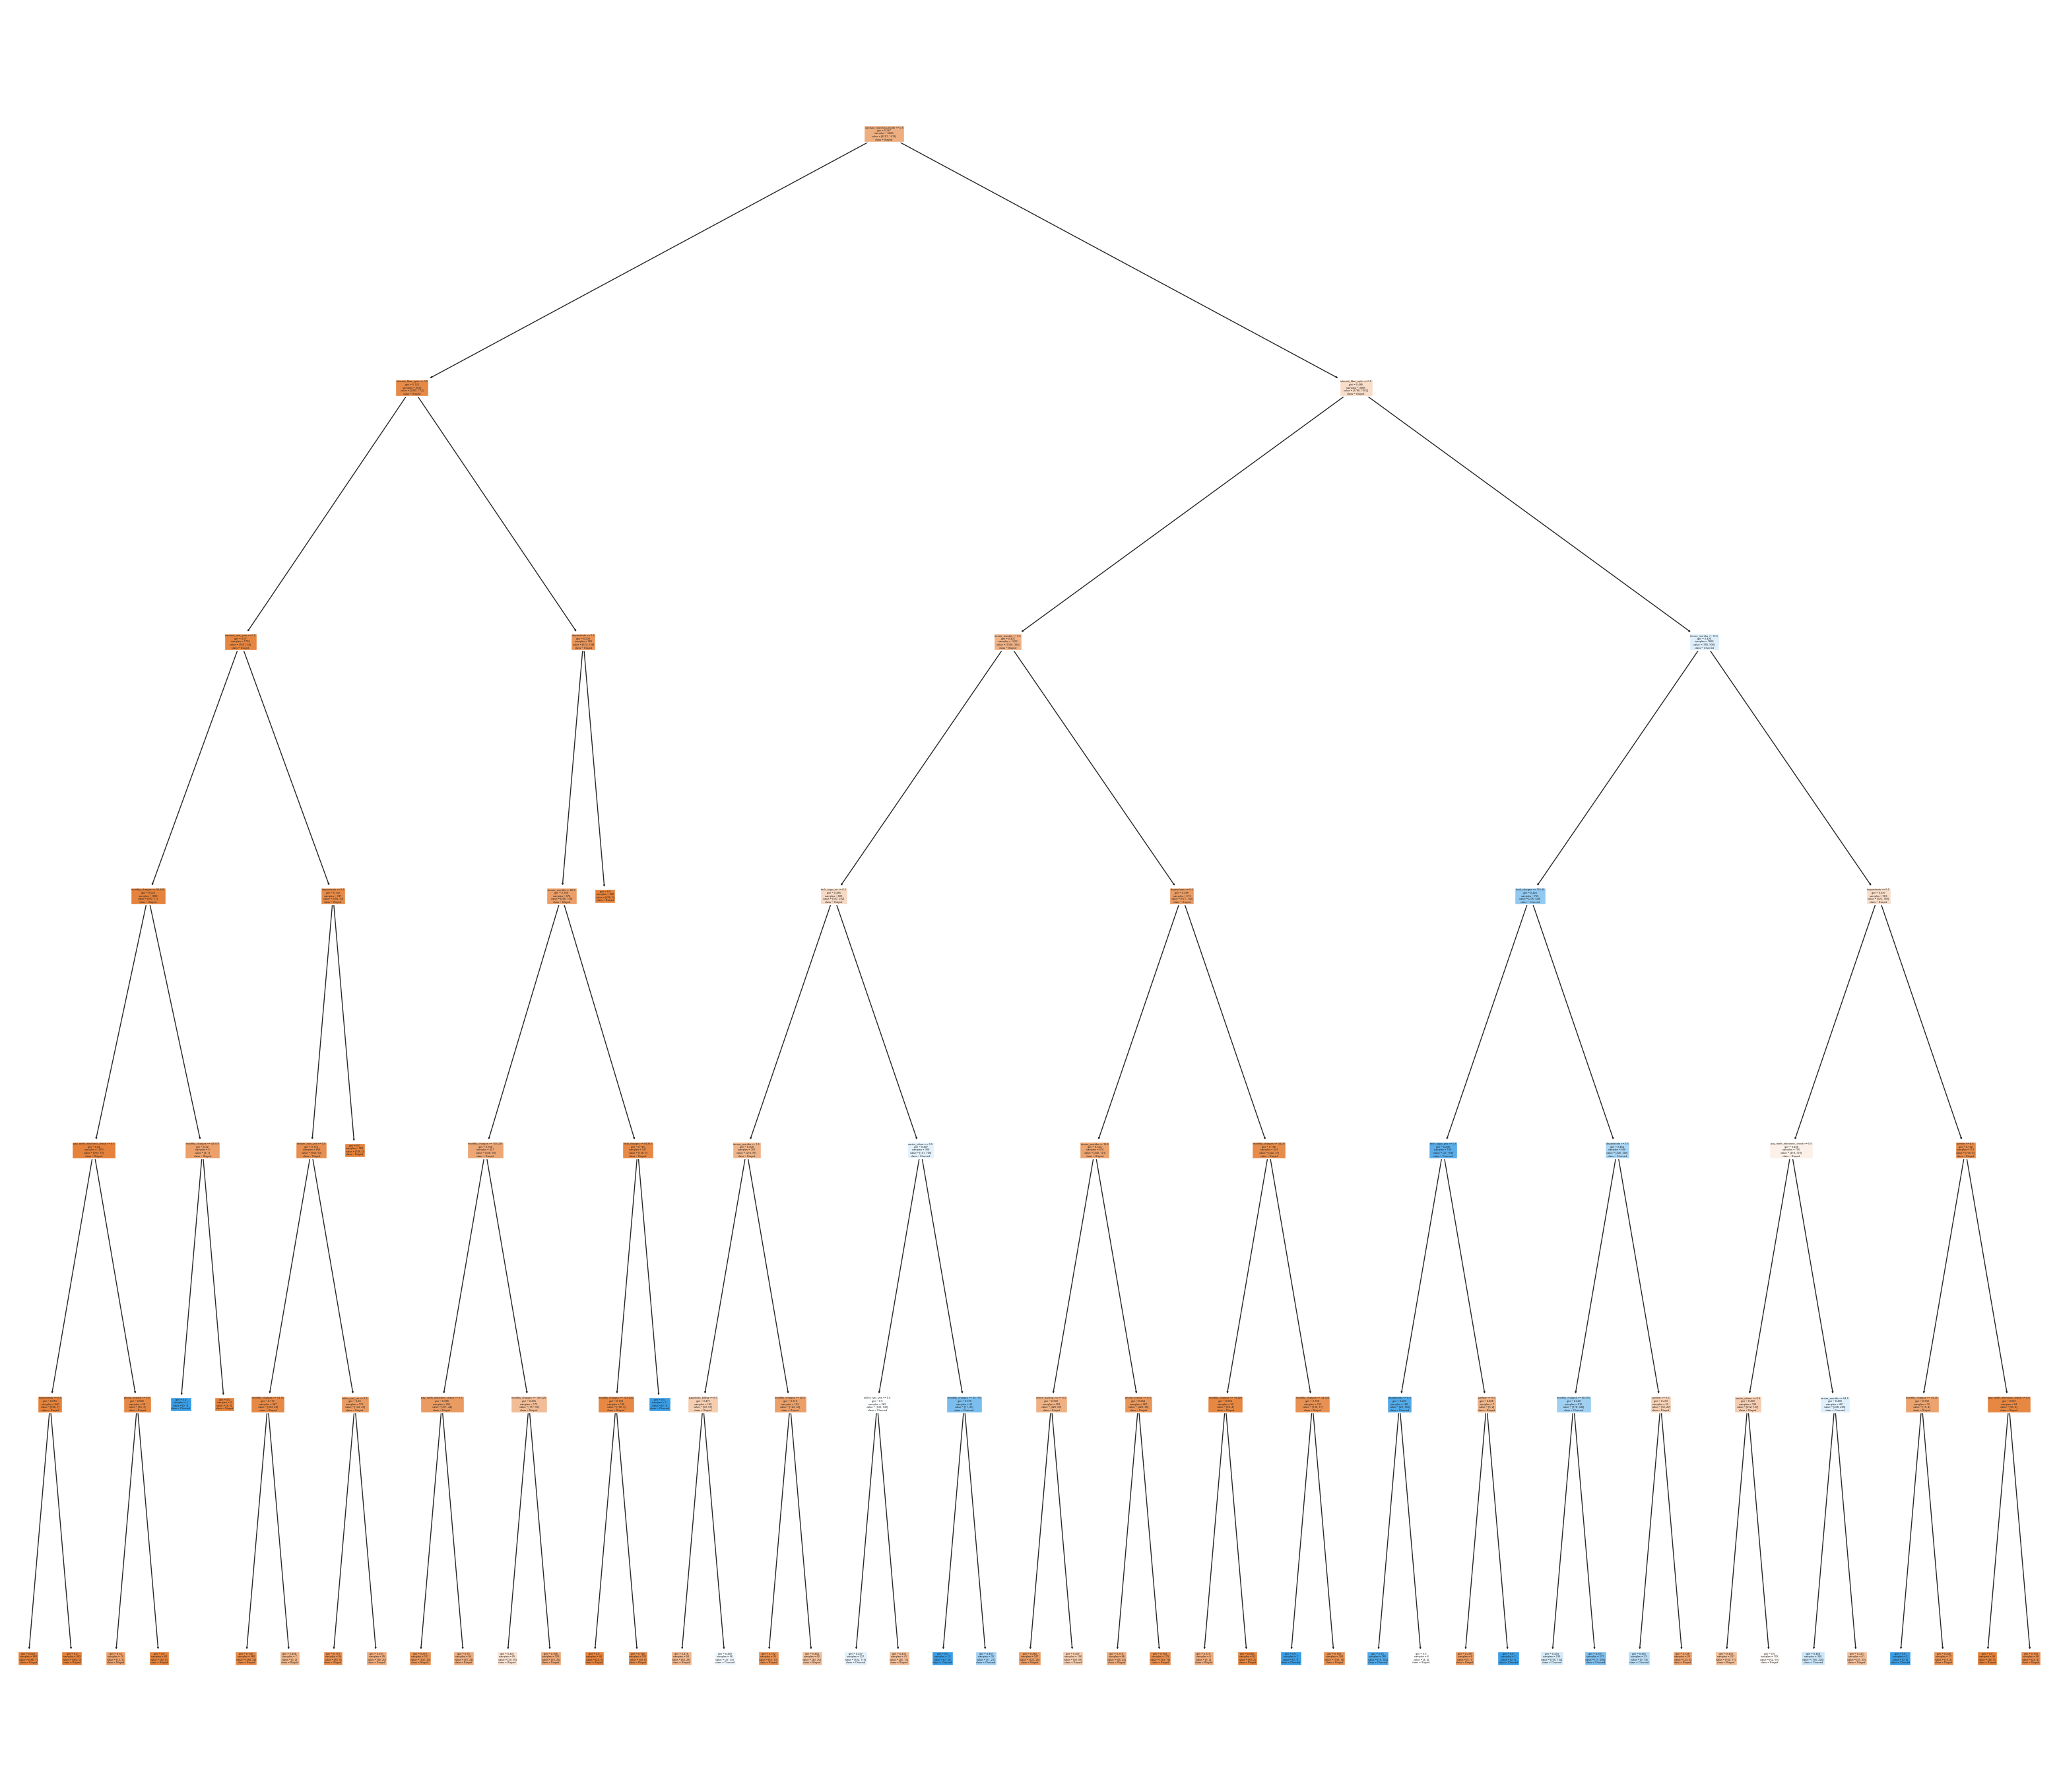

In [911]:
fig = plt.figure(figsize=(40, 35))
thing = tree.plot_tree(treeclf,
                       feature_names=Features,
                       class_names=['Stayed', 'Churned'],
                       filled=True)  # filled is the colour and is based on the classes

In [912]:
print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')


Score on training set: 0.8126222222222222
Score on testing set: 0.7974413646055437


In [913]:
y_pred_test =  treeclf.predict(X_test)

report = classification_report(y_test, y_pred_test, target_names=['stayed', 'churned'])
print(report)

              precision    recall  f1-score   support

      stayed       0.85      0.88      0.86      1012
     churned       0.65      0.59      0.62       395

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



In [914]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [4, 5, 6, 8, 10, 14],
                                  'min_samples_split': [5, 10, 15, 20, 50, 100],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                                  'max_features':[2,5, 10]},
                    cv = 10, # number of cross validation folds
                    refit = True, # What do I do for each fold?
                    verbose = 1, # Available options are 0, 1 and 2.
                    scoring = 'recall') # What performance metric do you want to prioritise?

In [915]:

now = time()


grid.fit(X_train, y_train)


print(f' Time in seconds: {time() - now}')

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
 Time in seconds: 85.23234009742737


In [916]:
grid.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 20}

In [917]:
grid.best_score_

0.5719571612428755

In [918]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=10, min_samples_leaf=4,
                       min_samples_split=20)

In [919]:
dt = DecisionTreeClassifier(max_depth=6, max_features = 10, min_samples_leaf=6, min_samples_split=5)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=10, min_samples_leaf=6,
                       min_samples_split=5)

In [920]:
dt.feature_importances_

array([0.        , 0.00825285, 0.        , 0.01784304, 0.11262476,
       0.        , 0.0232289 , 0.01397694, 0.04034764, 0.        ,
       0.        , 0.        , 0.01043908, 0.12976053, 0.        ,
       0.00806254, 0.        , 0.00834181, 0.        , 0.00140087,
       0.00537816, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00458842, 0.        , 0.08043579, 0.        ,
       0.        , 0.        , 0.        , 0.49803911, 0.00050297,
       0.        , 0.        , 0.00123637, 0.03554022, 0.        ])

In [921]:
importance = list(zip(Features, list(dt.feature_importances_)))

In [922]:
importance

[('gender', 0.0),
 ('senior_citizen', 0.00825284509893146),
 ('partner', 0.0),
 ('dependents', 0.017843037581602057),
 ('tenure_months', 0.11262475825136455),
 ('phone_service', 0.0),
 ('paperless_billing', 0.023228901347809038),
 ('monthly_charges', 0.013976942684095332),
 ('total_charges', 0.04034764206795246),
 ('mult_lines_no', 0.0),
 ('mult_lines_no_phone_service', 0.0),
 ('mult_lines_yes', 0.0),
 ('internet_dsl', 0.010439078969094578),
 ('internet_fiber_optic', 0.12976053139214117),
 ('internet_no', 0.0),
 ('online_sec_no', 0.008062542192455703),
 ('online_sec_no_internet_service', 0.0),
 ('online_sec_yes', 0.008341814610613202),
 ('online_backup_no', 0.0),
 ('online_backup_no_internet_service', 0.0014008705424887508),
 ('online_backup_yes', 0.005378156530728863),
 ('device_prot_no', 0.0),
 ('device_prot_no_internet_service', 0.0),
 ('device_prot_yes', 0.0),
 ('tech_supp_no', 0.0),
 ('tech_supp_no_internet_service', 0.0),
 ('tech_supp_yes', 0.004588420468861396),
 ('stream_tv_no'

In [923]:
importance = sorted(importance, key=lambda x: x[1], reverse=True)

In [924]:
importance

[('contract_month-to-month', 0.49803911177477145),
 ('internet_fiber_optic', 0.12976053139214117),
 ('tenure_months', 0.11262475825136455),
 ('stream_tv_no_internet_service', 0.08043578783479961),
 ('total_charges', 0.04034764206795246),
 ('pay_meth_electronic_check', 0.03554021788308379),
 ('paperless_billing', 0.023228901347809038),
 ('dependents', 0.017843037581602057),
 ('monthly_charges', 0.013976942684095332),
 ('internet_dsl', 0.010439078969094578),
 ('online_sec_yes', 0.008341814610613202),
 ('senior_citizen', 0.00825284509893146),
 ('online_sec_no', 0.008062542192455703),
 ('online_backup_yes', 0.005378156530728863),
 ('tech_supp_yes', 0.004588420468861396),
 ('online_backup_no_internet_service', 0.0014008705424887508),
 ('pay_meth_credit_card_(automatic)', 0.0012363683724868947),
 ('contract_one_year', 0.000502972396719741),
 ('gender', 0.0),
 ('partner', 0.0),
 ('phone_service', 0.0),
 ('mult_lines_no', 0.0),
 ('mult_lines_no_phone_service', 0.0),
 ('mult_lines_yes', 0.0),
 

#### Importance was considered however in feature engineering these had very little/no effect on model scores

In [925]:
y_pred_test = grid.predict(X_test)

report = classification_report(y_test, y_pred_test, target_names=['stayed', 'churned'])
print(report)

              precision    recall  f1-score   support

      stayed       0.84      0.86      0.85      1012
     churned       0.62      0.59      0.61       395

    accuracy                           0.78      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.78      0.78      0.78      1407



# Voting Classifier Model Creation

In [926]:
joblib.dump(grid, 'voting_classifier_model.pkl')


['voting_classifier_model.pkl']

In [927]:
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [928]:
lr_model = joblib.load('logistic_regression_model.pkl')
dt_model = joblib.load('voting_classifier_model.pkl')


In [929]:
voting_classifier = VotingClassifier(
    estimators=[('lr', lr_model), ('dt', dt_model)],
    voting='soft'
)


In [930]:
voting_classifier.fit(X_train, y_train)


Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=300, random_state=100,
                                                 verbose=3)),
                             ('dt',
                              GridSearchCV(cv=10,
                                           estimator=DecisionTreeClassifier(),
                                           param_grid={'max_depth': [4, 5, 6, 8,
                                                                     10, 14],
                                                       'max_features': [2, 5,
                                                                        10],
                                                       'min_samples_leaf': [2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6,
                                                                            7,
                                                                            8,
                                                                            9,
                                                                            10],
                                                       'min_samples_split': [5,
                                                                             10,
                                                                             15,
                                                                             20,
                                                                             50,
                                                                             100]},
                                           scoring='recall', verbose=1))],
                 voting='soft')

In [931]:
y_pred = voting_classifier.predict(X_test)


In [932]:
get_results(y_test, y_pred)


The confusion matrix for your predictions is:
[[922  90]
 [175 220]] 

The accuracy of your model is: 0.8116560056858564
The recall of your model is: 0.5569620253164557
The precision of your model is: 0.7096774193548387
The F1-score of your model is: 0.6241134751773049


In [933]:
y_pred_test = voting_classifier.predict(X_test)

report = classification_report(y_test, y_pred_test, target_names=['stayed', 'churned'])
print(report)

              precision    recall  f1-score   support

      stayed       0.84      0.91      0.87      1012
     churned       0.71      0.56      0.62       395

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407



# Building Top 500 List Based on Voting Classifier

In [934]:
df_not_churned = df_mapped[df_mapped.churn_value != 1].copy()

X_not_churned = df_not_churned[Features]

churn_probabilities = voting_classifier.predict_proba(X_not_churned)[:, 1]

df_not_churned['churn_probability'] = churn_probabilities

df_sorted_not_churned = df_not_churned.sort_values(by='churn_probability', ascending=False)

top_500_not_churned = df_sorted_not_churned.head(500)


In [935]:
top_500_not_churned['Rank'] = range(1, len(top_500_not_churned) + 1)


C:\Users\le4fe\AppData\Local\Temp\ipykernel_31348\3917317868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_500_not_churned['Rank'] = range(1, len(top_500_not_churned) + 1)


In [940]:
top_500_not_churned = top_500_not_churned[['Rank', 'customerid', 'churn_probability']]

In [941]:
top_500_not_churned

,Rank,customerid,churn_probability
4624,1,3489-HHPFY,0.848270
5906,2,4912-PIGUY,0.830843
5657,3,7577-SWIFR,0.829689
2676,4,7439-DKZTW,0.811658
3518,5,1393-IMKZG,0.803313
...,...,...,...
5142,496,8630-FJLIB,0.495302
4720,497,2018-PZKMU,0.494990
3523,498,1013-QCWAM,0.494880
4953,499,4553-DVPZG,0.494816


In [943]:
df_not_churned = df_not_churned[['customerid', 'churn_probability']]

In [944]:
df_not_churned

,customerid,churn_probability
1869,7590-VHVEG,0.653499
1870,5575-GNVDE,0.062074
1871,7795-CFOCW,0.055316
1872,1452-KIOVK,0.346252
1873,6713-OKOMC,0.256712
...,...,...
7038,2569-WGERO,0.003946
7039,6840-RESVB,0.064818
7040,2234-XADUH,0.023305
7041,4801-JZAZL,0.212181
